# Week 6
## Exercise 29
### 4.1 Ordinary least squares regression

This exercise is about applying the OLS regression method. Do not use ridge regression or kernel ridge regression yet.

### 4.2 Linear Function

a) Define a linear function and sample it for some values of x, e.g. $x\in\{1,2,4,5\}$

In [424]:
# some x's :)
xs = [-1, 1, 2, 4, 5]

# Define a linear function with slope and intercept as parameters
def lin_func(x, slope=2, intercept=3):
    return slope * x + intercept

for i, x in enumerate(xs):
    print(f"x = {x}, y = {lin_func(x)}")

x = -1, y = 1
x = 1, y = 5
x = 2, y = 7
x = 4, y = 11
x = 5, y = 13


Plot the function and indicate the sampled points.

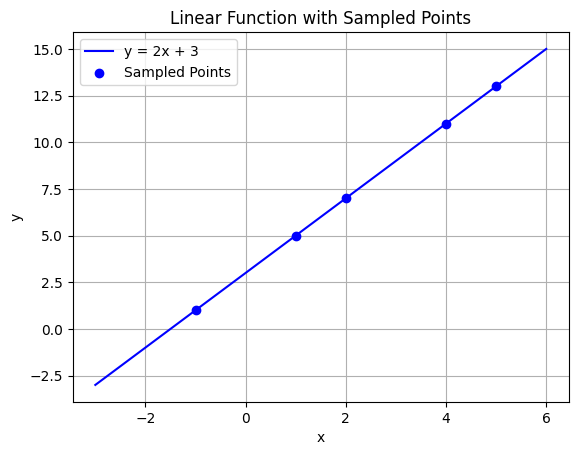

In [425]:
#  Plot the function and indicate the sampled points

import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values for plotting
x_values = np.linspace(-3, 6, 100)  # 100 points between 0 and 6
y_values = lin_func(x_values)

# Sampled points
ys = [lin_func(x) for x in xs]

# Plot the linear function
plt.plot(x_values, y_values, label="y = 2x + 3", color="blue")

# Plot the sampled points
plt.scatter(xs, ys, color="blue", zorder=5, label="Sampled Points")

# Add labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Function with Sampled Points")

# Show the legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

b) Introduce a function 

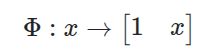

and use $\Phi$ to construct the matrix:

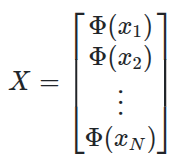

meaning that in Python you'll have a numpy-array, X.

In [426]:
# Introduce a function \Phi: x -> [1 x]

def Phi(x):
    return [1, x]

def X(xs):
    y = np.empty((0, 2))  

    for x in xs:
        y = np.append(y, [Phi(x)], axis=0) 

    return y

print(X(xs))


[[ 1. -1.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  4.]
 [ 1.  5.]]


c) Use X and a column vetor, y, of the observed variablers,

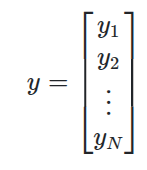

to solve for the parameters in a linear OLS model (the $\beta_0$ and $\beta_1$'s).

In [427]:
# Calculate the coefficients of the linear function, i.e. beta_0 and beta_1
X = X(xs)
y = ys
beta = np.linalg.inv(X.T @ X) @(X.T @ y)

print(f"The coefficients of the linear function are {beta}.")

The coefficients of the linear function are [3. 2.].


Draw some random values of x and plot the model predictions for those x-values.

(2,)
2.999999999999999


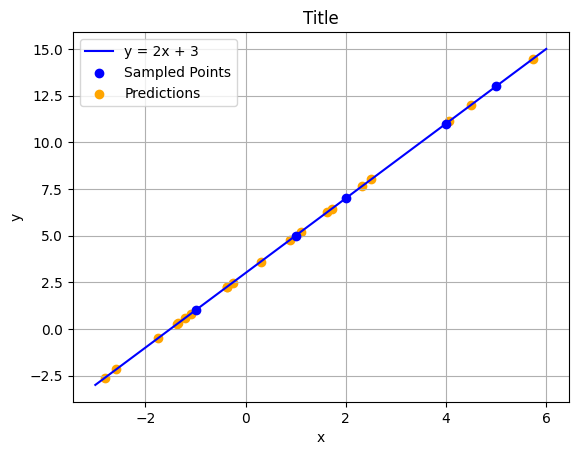

In [428]:
x_random = np.random.uniform(-3, 6, 20)
print(beta.shape)
print(beta[0])

y_new = beta[1] * x_random + beta[0]

plt.plot(x_values, y_values, label="y = 2x + 3", color="blue")

plt.scatter(xs, ys, color="blue", zorder=5, label="Sampled Points")
plt.scatter(x_random[:], y_new, color='orange', label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Title')
plt.legend()
plt.grid(True)
plt.show()

### 4.3 Quadratic function

a) Choose a parabola sample it at some x-values

In [429]:
# Define a quadratic function
def quad_func(x, a=1, b=2, c=-3):
    y = a * x**2 + b * x + c
    return y

for i, x in enumerate(xs):
    print(f"x = {x}, y = {quad_func(x)}")

x = -1, y = -4
x = 1, y = 0
x = 2, y = 5
x = 4, y = 21
x = 5, y = 32


Plot the parabola.

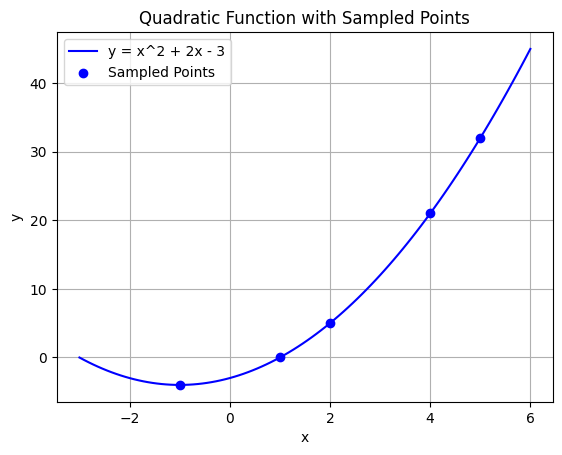

In [430]:
#  Plot the function and indicate the sampled points

# Define the range of x values for plotting
x_values = np.linspace(-3, 6, 100)  # 100 points between 0 and 6
y_values = quad_func(x_values)

# Sampled points
ys = [quad_func(x) for x in xs]

# Plot the linear function
plt.plot(x_values, y_values, label="y = x^2 + 2x - 3", color="blue")

# Plot the sampled points
plt.scatter(xs, ys, color="blue", zorder=5, label="Sampled Points")

# Add labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Quadratic Function with Sampled Points")

# Show the legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

b) Perform linear regression using the sampled points. Plot the points.

The coefficients of the linear function are [-2.63157895  6.10526316]. This is NOT a linear function, though.


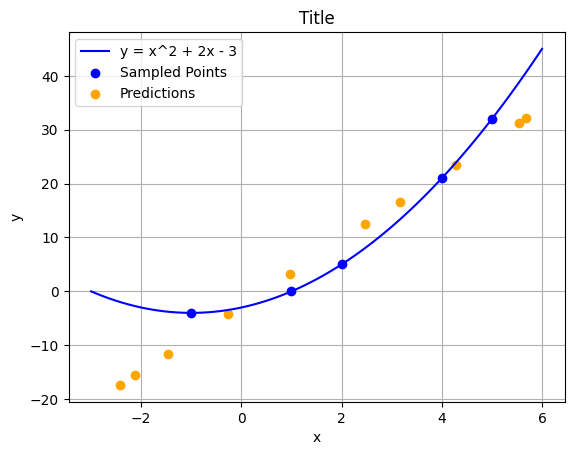

In [431]:
y = ys
beta = np.linalg.inv(X.T @ X) @(X.T @ y)

print(f"The coefficients of the linear function are {beta}. This is NOT a linear function, though.")

x_random = np.random.uniform(-3, 6, 10)
y_new = beta[1] * x_random + beta[0]

x_values = np.linspace(-3, 6, 100)  # 100 points between 0 and 6
y_values = quad_func(x_values)

# Plot the linear function
plt.plot(x_values, y_values, label="y = x^2 + 2x - 3", color="blue")

plt.scatter(xs, ys, color="blue", zorder=5, label="Sampled Points")
plt.scatter(x_random[:], y_new, color='orange', label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Title')
plt.legend()
plt.grid(True)
plt.show()

c) Introdcue a function 

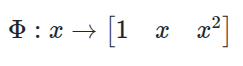 

and use $\Phi$ to construct matrix:

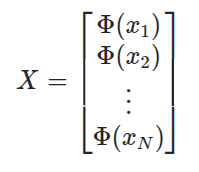

meaning that in Python you'll have a numpy-array, X.

In [432]:
def Phi(x):
    return [1, x, x**2]

def X(xs):
    y = np.empty((0, 3))  

    for x in xs:
        y = np.append(y, [Phi(x)], axis=0)  # Append along rows

    return y

# Test input
print(X(xs))


[[ 1. -1.  1.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]]


Use this X to find the parameters for a quadratic OLIS fit.

In [433]:
ys = [quad_func(x) for x in xs]
y = ys
X = X(xs)
print(y)
beta = np.linalg.inv(X.T @ X) @(X.T @ y)

print(f"The coefficients of the quadratic function are {beta}.")

[-4, 0, 5, 21, 32]
The coefficients of the quadratic function are [-3.  2.  1.].


Plot it at some random points.

The coefficients of the quadratic function are [-3.  2.  1.]


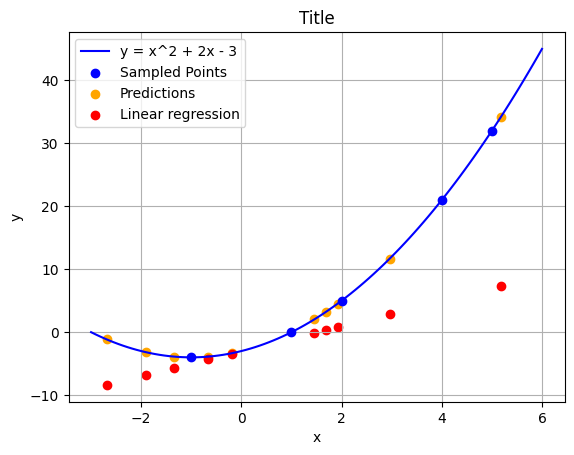

In [434]:
y = ys
beta = np.linalg.inv(X.T @ X) @(X.T @ y)

print(f"The coefficients of the quadratic function are {beta}")

x_random = np.random.uniform(-3, 6, 10)
y_new_quad = beta[2] * x_random**2 + beta[1] * x_random + beta[0]
y_new_lin = beta[1] * x_random + beta[0] 

x_values = np.linspace(-3, 6, 100)  # 100 points between 0 and 6
y_values = quad_func(x_values)

# Plot the linear function
plt.plot(x_values, y_values, label="y = x^2 + 2x - 3", color="blue")

plt.scatter(xs, ys, color="blue", zorder=5, label="Sampled Points")
plt.scatter(x_random[:], y_new_quad, color='orange', label='Predictions')
plt.scatter(x_random[:], y_new_lin, color='red', label='Linear regression')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Title')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 30

### 5.1 Ordinary and ridge regression 

This exercise concerns performing ridge regression and identifying the role of the regularization term. Do not use kernel ridge regression when solving this exercise.

### 5.2 Target function

a) Define a non-trivial func and sample it for some vals of x, e.g. $x\in\{-1,1,2,4,5\}$.

In [435]:
def non_triv_func(x):
    y = np.sin(1/2 * x) #+ 2 * x
    return y

for i, x in enumerate(xs):
    print(f"x = {x}, y = {non_triv_func(x)}")

x = -1, y = -0.479425538604203
x = 1, y = 0.479425538604203
x = 2, y = 0.8414709848078965
x = 4, y = 0.9092974268256817
x = 5, y = 0.5984721441039565


Plot the func and indicate the sampled points.

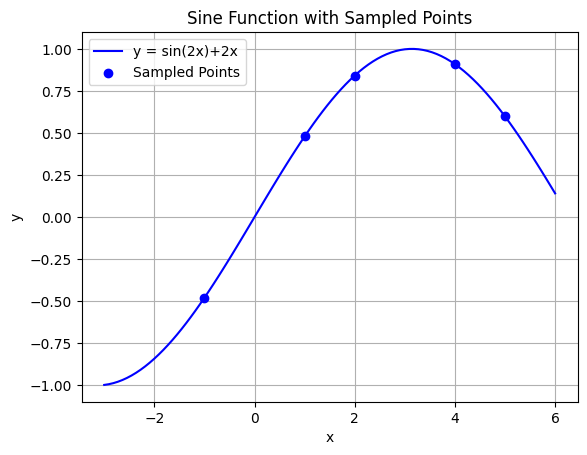

In [436]:
#  Plot the function and indicate the sampled points

# Define the range of x vals
x_values = np.linspace(-3, 6, 100)  # 100 points between 0 and 6
y_values = non_triv_func(x_values)

# Sampled points
ys = [non_triv_func(x) for x in xs]

# Plot the linear function
plt.plot(x_values, y_values, label="y = sin(2x)+2x", color="blue")

plt.scatter(xs, ys, color="blue", zorder=5, label="Sampled Points")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Sine Function with Sampled Points")
plt.legend()

plt.grid(True)
plt.show()

### 5.3 OLS regression

b) Do with non-linear OLS regression a non-linear fit with polynomial terms up to order 3.

In [437]:
# Introduce a function \Phi: x -> [1 x x^2 x^3]

def Phi(x):
    return np.array([1, x, x**2, x**3])

# creating the desgin matrix
def X(xs):
    y = np.empty((0, 4))  
    for x in xs:
        y = np.append(y, [Phi(x)], axis=0) 
    return y

print(xs)
print(X(xs)) # herherher


[-1, 1, 2, 4, 5]
[[  1.  -1.   1.  -1.]
 [  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]]


In [438]:
# generate sample points
xs = np.random.uniform(-3, 6, 5)
ys = [non_triv_func(x) for x in xs]

X = X(xs)
y_vector = np.array(ys)
beta = np.linalg.inv(X.T @ X) @(X.T @ y_vector)

print(f"The coefficients of the cubic function are {beta}.")

The coefficients of the cubic function are [-0.65499487  1.17274763 -0.23938822  0.01099087].


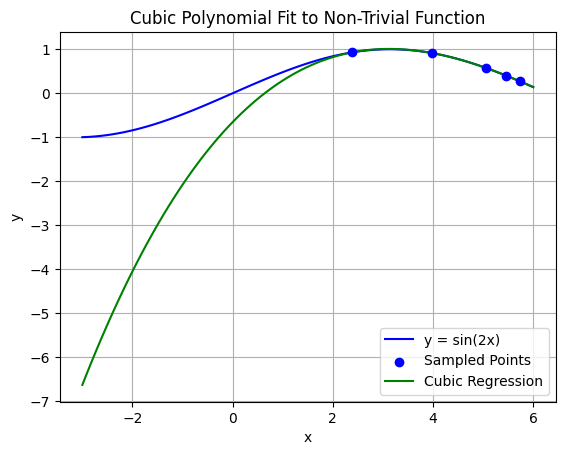

In [439]:

# Generate values for plotting
x_values = np.linspace(-3, 6, 100)
y_values = non_triv_func(x_values)
y_new_cubic = beta[3] * x_values**3 + beta[2] * x_values**2 + beta[1] * x_values + beta[0]

# Plot the original function and the fitted cubic polynomial
plt.plot(x_values, y_values, label="y = sin(2x)", color="blue")
plt.scatter(xs, ys, color="blue", zorder=5, label="Sampled Points")
plt.plot(x_values, y_new_cubic, color='green', label='Cubic Regression')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Polynomial Fit to Non-Trivial Function')
plt.legend()
plt.grid(True)
plt.show()


Check that:

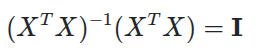

In [440]:
should_be_identity = np.linalg.inv(X.T @ X) @ (X.T @ X)
print(should_be_identity)

[[ 1.00000000e+00  1.34129820e-10  6.49494651e-10  3.35650125e-09]
 [ 5.78521165e-13  1.00000000e+00  4.82210026e-11  1.56345952e-10]
 [-3.80448941e-13 -6.09395401e-12  1.00000000e+00 -1.24519941e-10]
 [ 4.21970134e-14  2.28203804e-13  1.84411025e-12  1.00000000e+00]]


Gather in a class:

In [441]:
class OLS_cubic:
    def __init__(self, xs, ys, func):
        """
        Initialize the OLS_cubic class with sampled points and a user-defined function.

        Parameters:
        xs (array-like): Input x values.
        ys (array-like): Corresponding y values.
        func (callable): The original function from which ys are derived (or any function for comparison).
        """
        self.xs = np.array(xs)
        self.ys = np.array(ys)
        self.func = func  # Store the user-defined function
        self.beta = None
        self.fit()

    def Phi(self, x):
        """Transformation function to create the cubic polynomial basis."""
        return np.array([1, x, x**2, x**3])

    def X(self):
        """Construct the design matrix."""
        return np.vstack([self.Phi(x) for x in self.xs])

    def fit(self):
        """Fit the cubic polynomial using OLS."""
        X_matrix = self.X()
        self.beta = np.linalg.inv(X_matrix.T @ X_matrix) @ (X_matrix.T @ self.ys)

    def predict(self, x_values):
        """Predict y values using the fitted cubic model."""
        return self.beta[3] * x_values**3 + self.beta[2] * x_values**2 + self.beta[1] * x_values + self.beta[0]

    def plot_sampled_points(self):
        """Plot the original sampled points."""
        plt.scatter(self.xs, self.ys, color="blue", zorder=5, label="Sampled Points")

    def plot_original_function(self, x_values):
        """Plot the user-defined original function."""
        y_values = self.func(x_values)
        plt.plot(x_values, y_values, label="Original Function", color="blue", linestyle='dashed')

    def plot_cubic_regression(self, x_values):
        """Plot the cubic regression curve."""
        y_cubic = self.predict(x_values)
        plt.plot(x_values, y_cubic, color='green', label='Cubic Regression')

    def plot_all(self, x_range=(-3, 6), num_points=100):
        """
        Plot the sampled points, original function, and cubic regression.

        Parameters:
        x_range (tuple): Range of x values for plotting.
        num_points (int): Number of points for plotting the curve.
        """
        x_values = np.linspace(x_range[0], x_range[1], num_points)
        self.plot_sampled_points()
        self.plot_original_function(x_values)
        self.plot_cubic_regression(x_values)

        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Cubic Polynomial Fit to User-Defined Function')
        plt.legend()
        plt.grid(True)
        plt.show()

Example

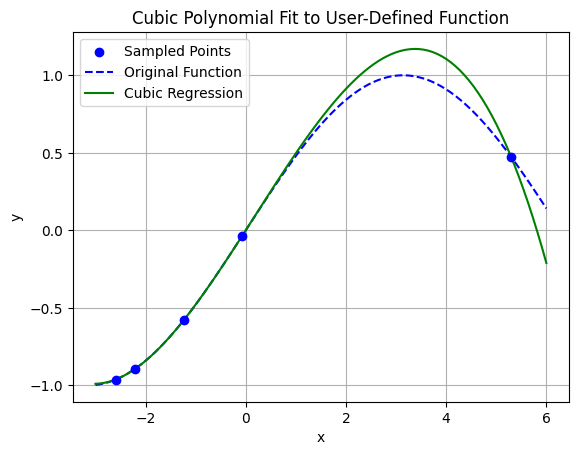

In [442]:
def custom_function(x):
    return np.sin(0.5 * x)

# Generate random sampled points
xs = np.random.uniform(-3, 6, 5)
ys = custom_function(xs)

# Create an instance of OLS_cubic
model = OLS_cubic(xs, ys, custom_function)

# Plot all components
model.plot_all()


c) Repeat b) but with terms up to order 8.

In [443]:
# Introduce a function \Phi: x -> [1 x x^2 x^3 ... x^8]

def Phi(x):
    return [1, x, x**2, x**3, x**4, x**5, x**6, x**7, x**8]

def X(xs):
    y = np.empty((0, 9))  

    for x in xs:
        y = np.append(y, [Phi(x)], axis=0) 

    return y

print(xs)
print(X(xs))


[ 5.29686812 -2.20356748 -1.23615424 -2.5929544  -0.07202702]
[[ 1.00000000e+00  5.29686812e+00  2.80568118e+01  1.48613232e+02
   7.87184690e+02  4.16961349e+03  2.20858927e+04  1.16986061e+05
   6.19659736e+05]
 [ 1.00000000e+00 -2.20356748e+00  4.85570965e+00 -1.06998839e+01
   2.35779162e+01 -5.19555293e+01  1.14487515e+02 -2.52280965e+02
   5.55918131e+02]
 [ 1.00000000e+00 -1.23615424e+00  1.52807730e+00 -1.88893923e+00
   2.33502024e+00 -2.88644516e+00  3.56809142e+00 -4.41071133e+00
   5.45231951e+00]
 [ 1.00000000e+00 -2.59295440e+00  6.72341252e+00 -1.74335021e+01
   4.52042759e+01 -1.17212626e+02  3.03926995e+02 -7.88068838e+02
   2.04342656e+03]
 [ 1.00000000e+00 -7.20270231e-02  5.18789206e-03 -3.73668421e-04
   2.69142240e-05 -1.93855144e-06  1.39628089e-07 -1.00569956e-08
   7.24375456e-10]]


In [444]:
ys = [non_triv_func(x) for x in xs]

X = X(xs)
y = ys
# print(y)
beta = np.linalg.inv(X.T @ X) @(X.T @ y)

print(f"The coefficients of the cubic function are {beta}.")

The coefficients of the cubic function are [-2.20513131e+00  7.17466615e-01 -7.02311570e-01 -2.71828922e-01
 -9.46783190e-03  4.35692314e-03 -2.97918411e-04  3.24652845e-04
  2.78251352e-05].


The coefficients of the cubic function are [-2.20513131e+00  7.17466615e-01 -7.02311570e-01 -2.71828922e-01
 -9.46783190e-03  4.35692314e-03 -2.97918411e-04  3.24652845e-04
  2.78251352e-05]


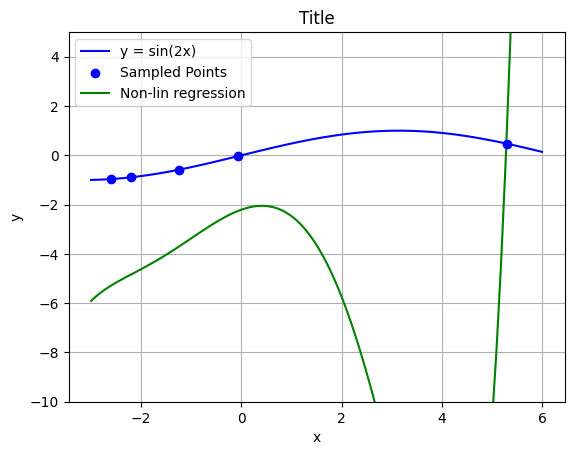

In [445]:
# X = X(xs)
y = ys
beta = np.linalg.inv(X.T @ X) @(X.T @ y)

print(f"The coefficients of the cubic function are {beta}")

x_random = np.random.uniform(-3, 6, 10)
x_values = np.linspace(-3, 6, 100)  # 100 points between 0 and 6
y_new_cubic = beta[8] * x_values**8 + beta[7] * x_values**7 + beta[6] * x_values**6 + beta[5] * x_values**5 + beta[4] * x_values**4 + beta[3] * x_values**3 + beta[2] * x_values**2 + beta[1] * x_values + beta[0]
y_values = non_triv_func(x_values)


# Plot the function
plt.plot(x_values, y_values, label="y = sin(2x)", color="blue")

plt.scatter(xs, ys, color="blue", zorder=5, label="Sampled Points")

# plot the cubic function
y_values = y_new_cubic
plt.plot(x_values, y_new_cubic, color='green', label='Non-lin regression')

plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-10,5)
plt.title('Title')
plt.legend()
plt.grid(True)
plt.show()

Inspect if:

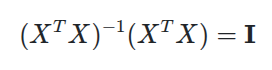

In [446]:
should_be_identity = np.linalg.inv(X.T @ X) @ (X.T @ X)
print(should_be_identity)

[[-4.52879976e+00 -2.68217303e+01 -1.47435637e+02 -7.69545187e+02
  -4.09822613e+03 -2.16766577e+04 -1.15014477e+05 -6.07754829e+05
  -3.22035152e+06]
 [ 1.71914895e+00  8.30380881e+00  3.96401034e+01  2.11763334e+02
   1.16011187e+03  6.16241023e+03  3.16919300e+04  1.72793995e+05
   8.61819735e+05]
 [-3.65108216e-01 -2.87325512e+00 -9.36822927e+00 -7.05712508e+01
  -2.59253396e+02 -2.39755490e+03 -1.01204233e+04 -6.88452200e+04
  -2.57825374e+05]
 [-1.73088797e-01 -1.00247882e+00 -3.54479486e+00 -2.10002665e+01
  -9.76550835e+01 -5.09676007e+02 -2.34554532e+03 -1.52635583e+04
  -9.78143268e+04]
 [ 2.61375580e-03  7.58690051e-03  1.16779649e-01  6.67419662e-01
   4.75423409e+00  6.97916111e+00  1.22942921e+02  1.95759358e+02
   1.75111688e+03]
 [ 2.17618290e-03  2.16314131e-02  8.74615045e-02  6.17228748e-01
   2.23901612e+00  1.49112212e+01  8.89222938e+01  3.05472005e+02
   1.97834526e+03]
 [-1.09387211e-04 -8.58328941e-04 -4.54737227e-03 -2.83945046e-02
  -1.22012322e-01 -7.2754353

Conclude: OLS regression is unstable when there are more parameters than data points.

(Here is the image from the exercise which shows it more clearly:

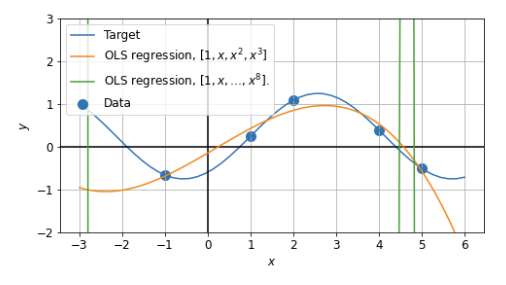

)

Modify OLS_cubic class to take any polynomial regression, i.e. can be used for e.g. fitting to order 8 in the above.

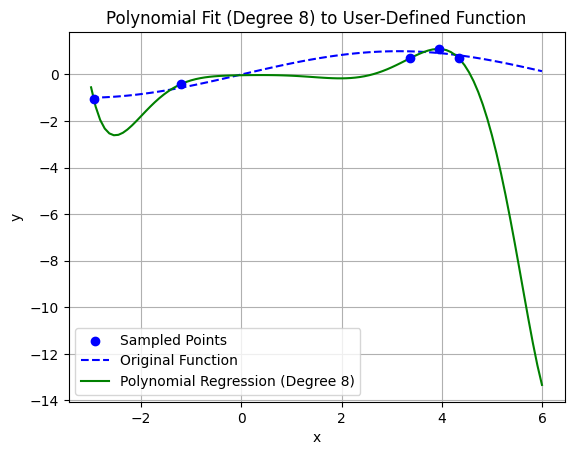

In [447]:
class OLS_polynomial:
    def __init__(self, xs, ys, func, degree=3):
        """
        Initialize the OLS_polynomial class with sampled points and a user-defined function.

        Parameters:
        xs (array-like): Input x values.
        ys (array-like): Corresponding y values.
        func (callable): The original function from which ys are derived.
        degree (int): Degree of the polynomial to fit.
        """
        self.xs = np.array(xs)
        self.ys = np.array(ys)
        self.func = func
        self.degree = degree
        self.beta = None
        self.fit()

    def Phi(self, x):
        """Transformation function to create the polynomial basis."""
        return np.array([x**i for i in range(self.degree + 1)])

    def X(self):
        """Construct the design matrix."""
        return np.vstack([self.Phi(x) for x in self.xs])

    def fit(self):
        """Fit the polynomial using OLS."""
        X_matrix = self.X()
        # Using lstsq for numerical stability
        self.beta, _, _, _ = np.linalg.lstsq(X_matrix, self.ys, rcond=None)

    def predict(self, x_values):
        """Predict y values using the fitted polynomial model."""
        y_pred = sum(self.beta[i] * x_values**i for i in range(self.degree + 1))
        return y_pred

    def plot_sampled_points(self):
        """Plot the original sampled points."""
        plt.scatter(self.xs, self.ys, color="blue", zorder=5, label="Sampled Points")

    def plot_original_function(self, x_values):
        """Plot the user-defined original function."""
        y_values = self.func(x_values)
        plt.plot(x_values, y_values, label="Original Function", color="blue", linestyle='dashed')

    def plot_polynomial_regression(self, x_values):
        """Plot the polynomial regression curve."""
        y_poly = self.predict(x_values)
        plt.plot(x_values, y_poly, color='green', label=f'Polynomial Regression (Degree {self.degree})')

    def plot_all(self, x_range=(-3, 6), num_points=100):
        """
        Plot the sampled points, original function, and polynomial regression.

        Parameters:
        x_range (tuple): Range of x values for plotting.
        num_points (int): Number of points for plotting the curve.
        """
        x_values = np.linspace(x_range[0], x_range[1], num_points)
        self.plot_sampled_points()
        self.plot_original_function(x_values)
        self.plot_polynomial_regression(x_values)

        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Polynomial Fit (Degree {self.degree}) to User-Defined Function')
        plt.legend()
        plt.grid(True)
        plt.show()

def custom_function(x):
    return np.sin(0.5 * x)

# Generate sampled points with some noise
xs = np.random.uniform(-3, 6, 5)
ys = custom_function(xs) + np.random.normal(0, 0.2, len(xs))

model = OLS_polynomial(xs, ys, custom_function, degree=8)

# Plot the fitted polynomial regression and the original function
model.plot_all()


### 5.4 Ridge regression

d) Apply ridge regression for the polynomial fit to order 8. Try different values for the regularization parameter, $\lambda$. 

The different $\lambda$'s are plotted in the same plot for $\lambda=0.1$ to $\lambda=100$

Ridge regression formula is 

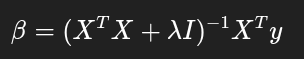

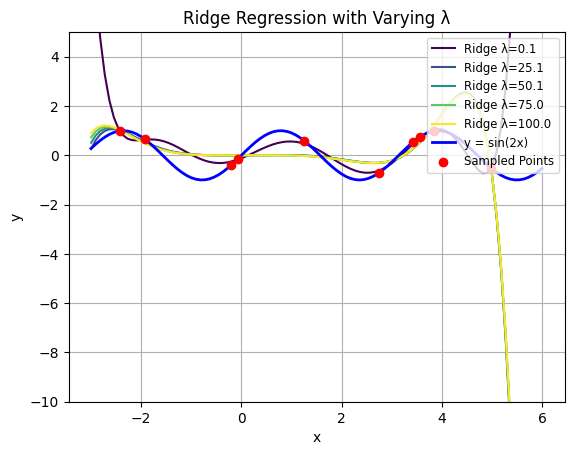

In [448]:
def non_triv_func(x):
    y = np.sin(2 * x)  # + 2 * x (if needed)
    return y

# Sampled points
x_random = np.random.uniform(-3, 6, 10)
y_random = non_triv_func(x_random)

# Generate smooth x values for plotting
x_values = np.linspace(-3, 6, 100)

# Create the design matrix X for a polynomial of degree 8
X = np.vstack([x_random**i for i in range(9)]).T  # Degree 8 -> 9 columns


number_of_ridges = 5
# Ridge regression with different lambda values
lamb = np.linspace(0.1, 100, number_of_ridges)  # Regularization parameters

# Generate a colormap for the different lambda values
colors = plt.cm.viridis(np.linspace(0, 1, len(lamb)))

# Loop over different lambda values and plot the curves
for i in range(number_of_ridges):
    # Ridge regression formula
    beta_ridge = np.linalg.inv(X.T @ X + lamb[i] * np.eye(9)) @ (X.T @ y_random)
    beta = beta_ridge
    
    # Predict y values using the fitted model
    y_new_ridge = (beta[8] * x_values**8 + beta[7] * x_values**7 +
                   beta[6] * x_values**6 + beta[5] * x_values**5 +
                   beta[4] * x_values**4 + beta[3] * x_values**3 +
                   beta[2] * x_values**2 + beta[1] * x_values + beta[0])
    
    # Plot the Ridge regression curve with a unique color
    plt.plot(x_values, y_new_ridge, color=colors[i], label=f'Ridge λ={lamb[i]:.1f}')

# Plot the original function
x_plot = np.linspace(-3, 6, 100)
y_plot = non_triv_func(x_plot)
plt.plot(x_plot, y_plot, label="y = sin(2x)", color="blue", linewidth=2)

# Plot the sampled points
plt.scatter(x_random, y_random, color="red", zorder=5, label="Sampled Points")

# Plot settings
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-10, 5)
plt.title('Ridge Regression with Varying λ')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.show()

Conclude: The fit becomes stable in ridge regression, but of course very uncertain (if not random) in regions with no data. For very large values of the regularization parameter, the fit will not reproduce the data points very accurately (the green line misses the first two data points).

Gathered Ridge Regression into a class:

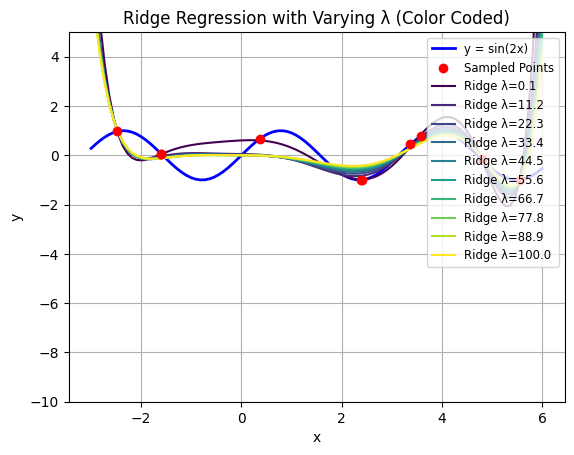

In [638]:
class RidgeRegression:
    def __init__(self, x_samples, y_samples, func, degree=8, lambdas=None):
        """
        Initialize the RidgeRegression class.

        Parameters:
        x_samples (array-like): Sampled x values.
        y_samples (array-like): Corresponding y values.
        func (callable): Original function for comparison.
        degree (int): Degree of the polynomial to fit.
        lambdas (array-like): Regularization parameter values.
        """
        self.x_samples = np.array(x_samples)
        self.y_samples = np.array(y_samples)
        self.func = func
        self.degree = degree
        self.lambdas = lambdas if lambdas is not None else np.linspace(0.1, 100, 10)
        self.betas = []

    def create_design_matrix(self, xs):
        """Generate the design matrix for the polynomial fit."""
        return np.vstack([xs**i for i in range(self.degree + 1)]).T

    def fit(self):
        """Fit the Ridge Regression model for each lambda."""
        X = self.create_design_matrix(self.x_samples)
        for lamb in self.lambdas:
            ridge_matrix = np.linalg.inv(X.T @ X + lamb * np.eye(self.degree + 1)) @ (X.T @ self.y_samples)
            self.betas.append(ridge_matrix)

    def predict(self, x_values, beta):
        """Predict y values using the fitted model."""
        return sum(beta[i] * x_values**i for i in range(len(beta)))

    def plot(self, x_range=(-3, 6), num_points=100):
        """Plot the original function, sampled points, and Ridge Regression curves."""
        x_values = np.linspace(x_range[0], x_range[1], num_points)

        # Plot the original function
        y_values = self.func(x_values)
        plt.plot(x_values, y_values, label="y = sin(2x)", color="blue", linewidth=2)

        # Plot the sampled points
        plt.scatter(self.x_samples, self.y_samples, color="red", zorder=5, label="Sampled Points")

        # Color map for Ridge Regression curves
        colors = plt.cm.viridis(np.linspace(0, 1, len(self.lambdas)))

        # Plot each Ridge Regression curve
        for i, beta in enumerate(self.betas):
            y_new_ridge = self.predict(x_values, beta)
            plt.plot(x_values, y_new_ridge, color=colors[i], label=f'Ridge λ={self.lambdas[i]:.1f}')

        # Plot settings
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim(-10, 5)
        plt.title('Ridge Regression with Varying λ (Color Coded)')
        plt.legend(loc='upper right', fontsize='small')
        plt.grid(True)
        plt.show()

    def plot_just_one_lambda(self, chosen_lambda, x_range=(-3, 6), y_range=(-4, 4), num_points=100):
        """
        Plot the Ridge Regression curve for a single chosen lambda.

        Parameters:
        - chosen_lambda: The specific lambda value to plot.
        - x_range: The range of x values for plotting.
        - y_range: The range of y values for plotting.
        - num_points: The number of points to use for the plot.
        """
        x_values = np.linspace(x_range[0], x_range[1], num_points)

        # Plot the original function
        y_values = self.func(x_values)
        plt.plot(x_values, y_values, label="Original Function", color="blue", linewidth=2)

        # Plot the sampled points
        plt.scatter(self.x_samples, self.y_samples, color="red", zorder=5, label="Sampled Points")

        # Find the index of the chosen lambda
        try:
            index = np.where(np.isclose(self.lambdas, chosen_lambda))[0][0]
            beta = self.betas[index]
        except IndexError:
            print(f"Lambda value {chosen_lambda} not found in the fitted models.")
            return

        # Plot the chosen Ridge Regression curve
        y_new_ridge = self.predict(x_values, beta)
        plt.plot(x_values, y_new_ridge, color='green', label=f'Ridge λ={chosen_lambda:.1f}')

        # Plot settings
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim(y_range)  # Set y-axis limits
        plt.title(f'Ridge Regression for λ={chosen_lambda}')
        plt.legend(loc='upper right', fontsize='small')
        plt.grid(True)
        plt.show()

    
    
# Example usage
def non_triv_func(x):
    return np.sin(2 * x)

# Generate random sample points
np.random.seed(42)
x_random = np.random.uniform(-3, 6, 10)
y_random = non_triv_func(x_random)

# Create an instance of RidgeRegression
model = RidgeRegression(x_random, y_random, non_triv_func)

# Fit the model
model.fit()

# Plot the results
model.plot()


COMMENT: on how the regression changes depending on lambda. Does the plot show this?!

### 5.5 Data with noise 

e) Sample the function at mor ex-vals and add a little noise term to the observed values: 

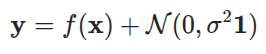

In [467]:
# normal-fordeling rund om 0

def non_triv_func(x):
    return 3*np.sin(0.5 * x)

def noise_func(x, sigma = 0.05):
    mu = 0.0
    N = 20
    normal_dist = np.random.normal(mu, sigma, N)
    y = non_triv_func(x) + normal_dist
    print(non_triv_func(x),normal_dist, sigma)
    return y

print(noise_func(2.5))
print(non_triv_func(2.5))

2.8469538580667586 [-0.06001482 -0.01672506 -0.02374727 -0.03266646  0.08827271  0.02024909
 -0.0630442   0.0458931   0.10610781  0.05162326 -0.0759685  -0.0242117
  0.06334556 -0.03538347  0.02219097  0.0387317  -0.04634652 -0.00297627
 -0.16206337 -0.05121938] 0.05
[2.78693904 2.8302288  2.82320659 2.8142874  2.93522657 2.86720294
 2.78390966 2.89284696 2.95306167 2.89857712 2.77098536 2.82274215
 2.91029942 2.81157038 2.86914483 2.88568556 2.80060733 2.84397759
 2.68489049 2.79573448]
2.8469538580667586


[ 0.28073236  0.98924564 -0.91490001  0.86149122  0.97450067  0.32806933
  0.99975529  0.59019219  0.41612057  0.98443493  0.97146433 -0.72211734
  0.67197641  0.62220693  0.71343332 -0.99849337 -0.73002017  0.95733135
  0.69805139  0.97689058] [ 0.07772689  0.36883905  0.21441491 -0.03998463 -0.00475405 -0.25063234
 -0.00462828 -0.07216466  0.08067964 -0.20680774  0.12983663  0.38318473
 -0.02719004  0.10042793  0.172536   -0.10030512  0.05602312  0.0031481
  0.02441902 -0.19325245] 0.25


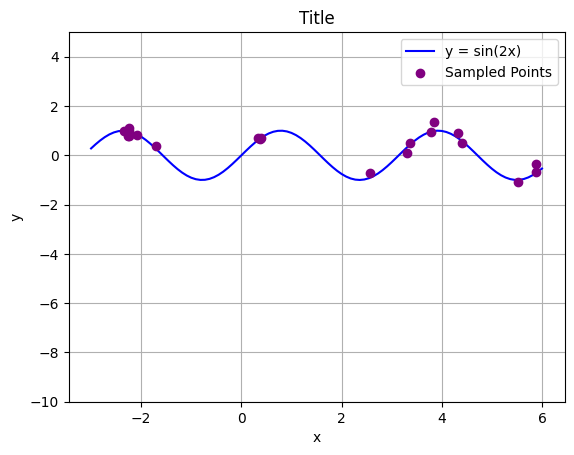

In [476]:
# plotting sine function 
x_plot = np.linspace(-3, 6, 100)  # 100 points between 0 and 6
y_plot = non_triv_func(x_plot)
plt.plot(x_plot, y_plot, label="y = sin(2x)", color="blue")

# generate noisy points
x_random = np.random.uniform(-3, 6, 20)
y_noise = noise_func(x_random,sigma=0.25)

plt.scatter(x_random, y_noise,color="purple", zorder=5, label="Sampled Points")
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-10,5)
plt.title('Title')
plt.legend()
plt.grid(True)
plt.show()

f.1) Use OLS regression to fit the function

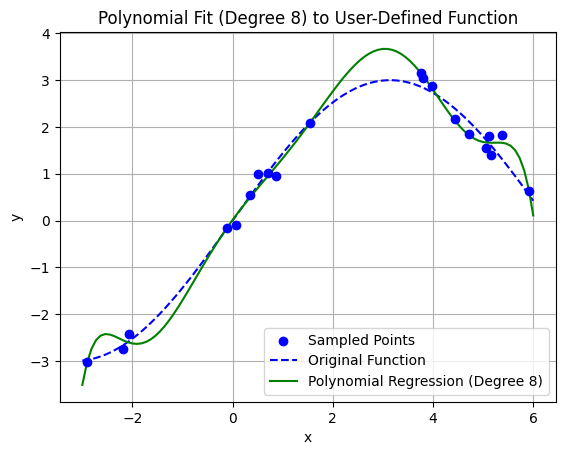

In [473]:
# Generate random sampled points
xs = x_random 
ys = y_noise

def custom_function(x):
    return np.sin(1 * x)

# Create an instance of OLS_cubic
model = OLS_polynomial(xs, ys,non_triv_func, 8)

# Plot all components
model.plot_all()


f.2) Use ridge regression to fit the function

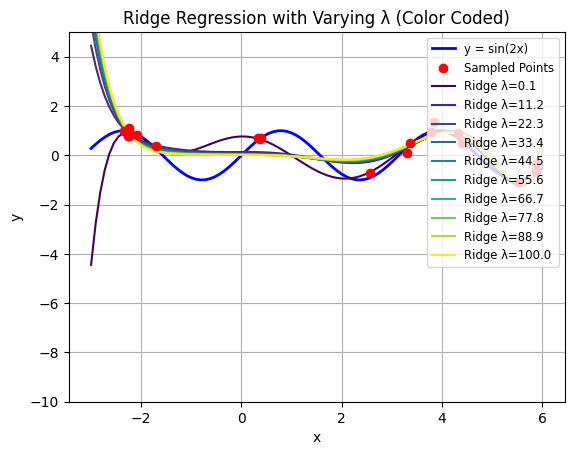

In [477]:
# Example usage
def non_triv_func(x):
    return np.sin(2 * x)

xs = x_random 
ys = y_noise

# Create an instance of RidgeRegression
model = RidgeRegression(xs, ys, non_triv_func)

# Fit the model
model.fit()

# Plot the results
model.plot()


COMMENT: What do I expect to happen?

## Exercise 31

### 6.1 Kernel Ridge Regression

a) Consider the function 

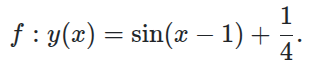

Sample it at $x\in\{-1,1,2,4,5\}$. 

In [494]:
# some x's :)
xs = [-1, 1, 2, 4, 5]

# Define the function
def sine_func(x):
    return np.sin(x-1)+0.25

for i, x in enumerate(xs):
    print(f"x = {x}, y = {sine_func(x)}")

x = -1, y = -0.6592974268256817
x = 1, y = 0.25
x = 2, y = 1.0914709848078965
x = 4, y = 0.39112000805986724
x = 5, y = -0.5068024953079282


Plot the function and the sampled points.

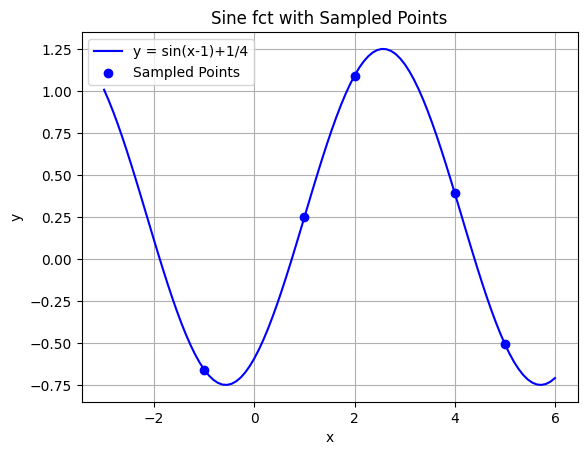

In [495]:
# Define the range of x values for plotting
x_plot = np.linspace(-3, 6, 100)  # 100 points between 0 and 6
y_plot = y(x_plot)

# Sampled points
ys = [sine_func(x) for x in xs]

# Plot the linear function
plt.plot(x_plot, y_plot, label="y = sin(x-1)+1/4", color="blue")

# Plot the sampled points
plt.scatter(xs, ys, color="blue", zorder=5, label="Sampled Points")

# Add labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sine fct with Sampled Points")

# Show the legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

Define class KernelRidgeRegression in the style of RidgeRegression, for use in the following exercises with different kernels.

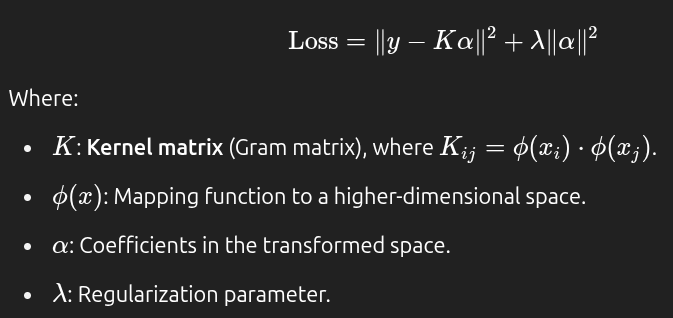

with the solution

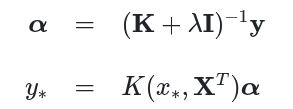

In [498]:
class KernelRidgeRegression:
    def __init__(self, x_samples, y_samples, func, kernel='rbf', lamb=10**-4, gamma=1.0, degree=8):
        """
        Initialize the KernelRidgeRegression class.

        Parameters:
        x_samples (array-like): Sampled x values.
        y_samples (array-like): Corresponding y values.
        func (callable): Original function for comparison.
        kernel (str): Kernel type ('rbf', 'polynomial', 'linear').
        gamma (float): Kernel coefficient for RBF and polynomial kernels. The coef before the dot product.
        degree (int): Degree of the polynomial kernel.
        """
        self.x_samples = np.array(x_samples)
        self.y_samples = np.array(y_samples)
        self.func = func
        self.kernel = kernel
        self.gamma = gamma
        self.degree = degree
        self.lamb = lamb
        self.alphas = []

    def kernel_function(self, x1, x2):
        """Compute the kernel matrix based on the chosen kernel type."""
        if self.kernel == 'linear':
            return np.dot(x1, x2.T)
        elif self.kernel == 'polynomial':
            return (self.gamma * np.dot(x1, x2.T) + 1) ** self.degree
        elif self.kernel == 'rbf':
            sq_dist = np.sum((x1[:, np.newaxis] - x2) ** 2, axis=2)
            return np.exp(-self.gamma * sq_dist)
        else:
            raise ValueError("Unsupported kernel type. Choose 'linear', 'polynomial', or 'rbf'.")

    def fit(self):
        """Fit the Kernel Ridge Regression model for lambda."""
        # Reshape to 2D for pairwise kernel calculation
        x_samples_reshaped = self.x_samples[:, np.newaxis]
        
        # Compute the kernel matrix
        K = self.kernel_function(x_samples_reshaped, x_samples_reshaped)
        
        # Solve (K + λI)α = y
        self.alpha = np.linalg.inv(K + self.lamb * np.eye(len(self.x_samples))) @ self.y_samples

    def predict(self, x_values, alpha):
        """Predict y values using the fitted Kernel Ridge model."""
        x_values_reshaped = x_values[:, np.newaxis]
        x_samples_reshaped = self.x_samples[:, np.newaxis]
        
        # Kernel between new points and training samples
        K_pred = self.kernel_function(x_values_reshaped, x_samples_reshaped)
        
        # Return the predicted values
        return K_pred @ alpha

    def plot(self, x_range=(-3, 6), num_points=100):
        """Plot the original function, sampled points, and Kernel Ridge Regression curve."""
        x_values = np.linspace(x_range[0], x_range[1], num_points)

        # Plot the original function
        y_values = self.func(x_values)
        plt.plot(x_values, y_values, label="Original Function", color="blue", linewidth=2)

        # Plot the sampled points
        plt.scatter(self.x_samples, self.y_samples, color="red", zorder=5, label="Sampled Points")

        # Predict and plot the fitted Kernel Ridge Regression curve
        y_new_kr = self.predict(x_values, self.alpha)
        plt.plot(x_values, y_new_kr, color="green", label=f'Kernel Ridge λ={self.lamb:.1e}')

        # Plot settings
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim(-10, 5)
        plt.title(f'Kernel Ridge Regression with Kernel: {self.kernel}')
        plt.legend(loc='upper right', fontsize='small')
        plt.grid(True)
        plt.show()


# x_sample = [-1, 1, 2, 4, 5]
# y_sample = [y(x) for x in xs]

# # Create an instance of KernelRidgeRegression with RBF kernel
# model = KernelRidgeRegression(x_sample, y_sample, sine_func, kernel='polynomial', gamma=1, degree=2)

# # Fit the model
# model.fit()

# # Plot the results
# model.plot()


b.1) Do kernel ridge regression with this kernels:
- the 2nd order polynomial kernel,

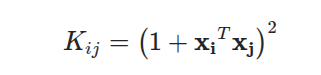

For the regularization parameter use e.g. $\lambda=10^{-4}$.

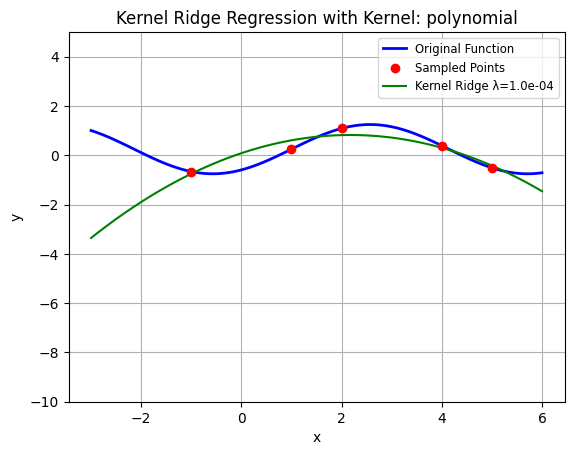

In [ ]:
x_sample = [-1, 1, 2, 4, 5]
y_sample = [sine_func(x) for x in x_sample]

# Create an instance of KernelRidgeRegression with RBF kernel
model = KernelRidgeRegression(x_sample, y_sample, sine_func, kernel='polynomial', gamma=1, degree=2)

# Fit the model
model.fit()

# Plot the results
model.plot()

b.2) Do kernel ridge regression with this kernels:

- the 8the order polynomial kernel, 

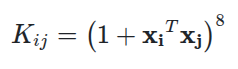

For the regularization parameter use e.g. $\lambda=10^{-4}$.

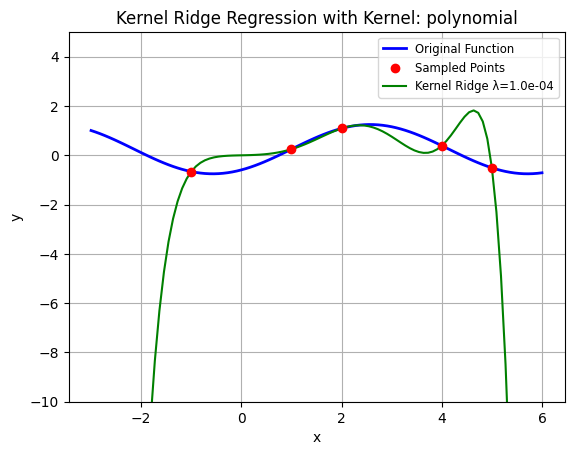

In [ ]:
x_sample = [-1, 1, 2, 4, 5]
y_sample = [sine_func(x) for x in x_sample]

# Create an instance of KernelRidgeRegression with RBF kernel
model = KernelRidgeRegression(x_sample, y_sample, sine_func, kernel='polynomial', gamma=1, degree=8)

# Fit the model
model.fit()

# Plot the results
model.plot()

b.3) Do kernel ridge regression with this kernels:
- the Gaussian kernel:

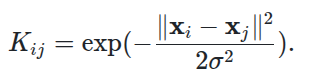

For the regularization parameter use e.g. $\lambda=10^{-4}$.

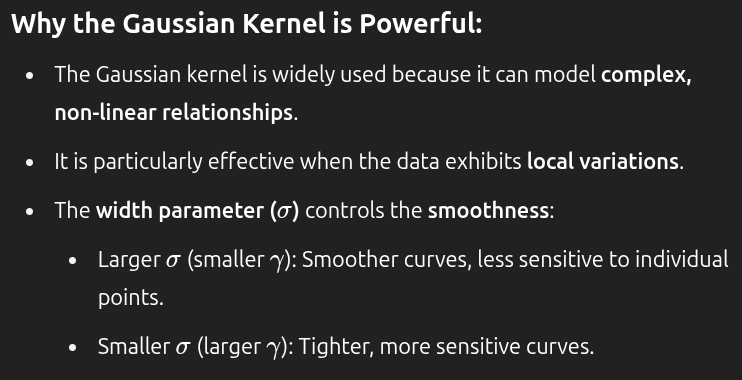

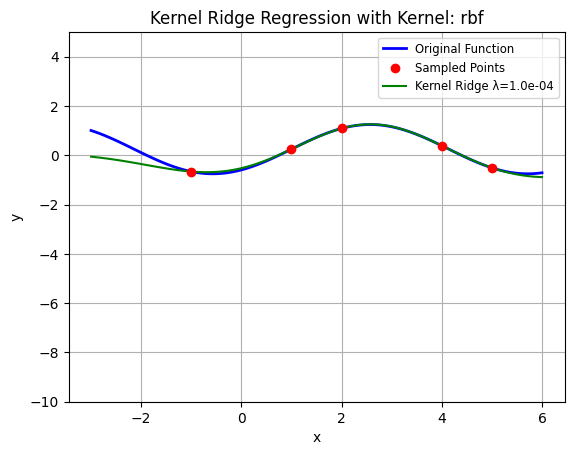

In [ ]:
x_sample = [-1, 1, 2, 4, 5]
y_sample = [y(x) for x in x_sample]

sigma = 2

# Create an instance of KernelRidgeRegression with RBF kernel
model = KernelRidgeRegression(x_sample, y_sample, sine_func, kernel='rbf', gamma=1/(2*sigma**2), degree=42) # degree is not relevant in Gaussian kernel

# Fit the model
model.fit()

# Plot the results
model.plot()

### 6.2 Data with noise

c) Sample a lot more data points, but add noise.

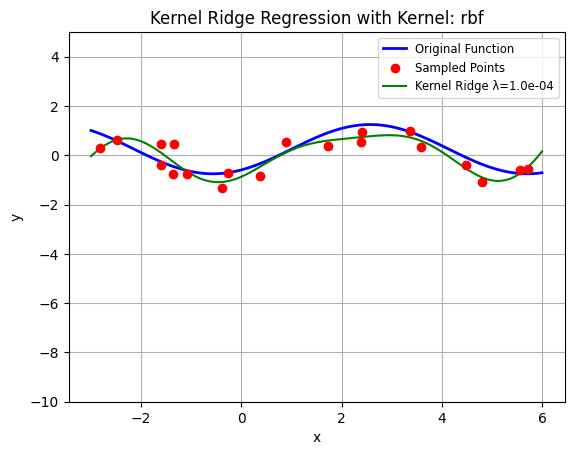

In [ ]:
def noise_func(x, sigma=0.5):
    mu = 0.0
    # Generate a single noise value for each x
    normal_dist = np.random.normal(mu, sigma)
    y = sine_func(x) + normal_dist
    return y

np.random.seed(42)
x_sample = np.random.uniform(-3, 6, 20)
y_sample = [noise_func(x) for x in x_sample]

sigma = 2

# Create an instance of KernelRidgeRegression with RBF kernel
model = KernelRidgeRegression(x_sample, y_sample, sine_func, kernel='rbf', gamma=1/(2*sigma**2), degree=42) # degree is not relevant in Gaussian kernel

# Fit the model
model.fit()

# Plot the results
model.plot()

d) Perform the kernel ridge regression with the various kernels. Try perhabs to vary the $\sigma$ hyperparameter of the Gaussian kernel.

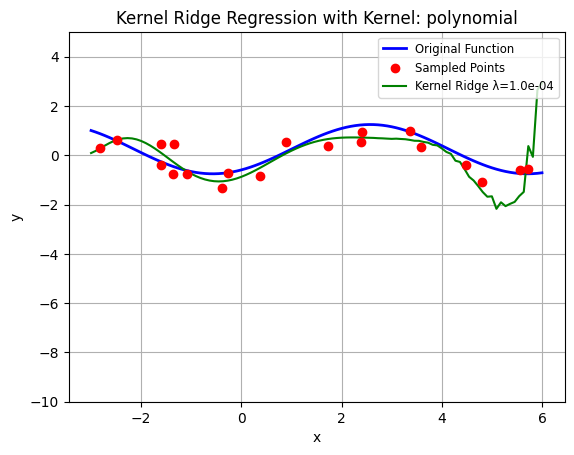

In [ ]:
def noise_func(x, sigma=0.5):
    mu = 0.0
    # Generate a single noise value for each x
    normal_dist = np.random.normal(mu, sigma)
    y = sine_func(x) + normal_dist
    return y

np.random.seed(42)
x_sample = np.random.uniform(-3, 6, 20)
y_sample = [noise_func(x) for x in x_sample]

sigma = 2

# Create an instance of KernelRidgeRegression with RBF kernel
model = KernelRidgeRegression(x_sample, y_sample, sine_func, kernel='polynomial', gamma=1, degree=8) 

# Fit the model
model.fit()

# Plot the results
model.plot()

## Exercise 32

### 7.1 The LJ potential

a) Sample the Lennard-Jones potential with the $\varepsilon_0$ and $\sigma$ values we have used previously. Get 4 r-values for which 0.85 < r < 1 and 8 r-values for which 1 < r < 2.

In [ ]:
from scipy.spatial.distance import pdist

class LennardJones:
    def __init__(self, eps0=5, sigma=1, r_min=0.89):
        self.eps0 = eps0
        self.sigma = sigma
        self.r_min = r_min
        
    def V(self, r):
        r = np.maximum(r,self.r_min)
        return 4 * self.eps0 * ((self.sigma / r) ** 12 - (self.sigma / r) ** 6)

    def energy(self, pos):
        distances = pdist(pos)  
        return np.sum(self.V(distances))

In [ ]:

lj = LennardJones()

np.random.seed(42)
points_1 = np.random.uniform(0.85, 1, 4)
points_2 = np.random.uniform(1, 2, 8)
combined_points = np.concatenate((points_1, points_2))

print("Combined points:", combined_points)


Combined points: [0.90618102 0.99260715 0.95979909 0.93979877 1.15601864 1.15599452
 1.05808361 1.86617615 1.60111501 1.70807258 1.02058449 1.96990985]


Plot the data.

12
12


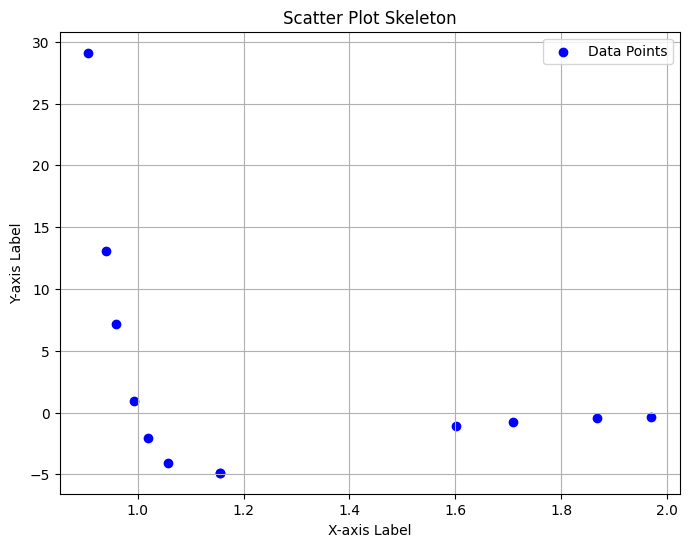

In [605]:
x_sample = combined_points
y_sample = [lj.V(x) for x in x_sample]

print(len(x_sample))
print(len(y))


# Create the scatter plot
plt.figure(figsize=(8, 6))  # Optional: Set figure size
plt.scatter(x_sample, y_sample, color='blue', marker='o', label='Data Points')

# Add plot elements
plt.title('Scatter Plot Skeleton')      # Title of the plot
plt.xlabel('X-axis Label')              # X-axis label
plt.ylabel('Y-axis Label')              # Y-axis label
plt.legend(loc='upper right')           # Legend location
plt.grid(True)                          # Show grid

# Show the plot
plt.show()


### 7.2 OLS regression

b) Fut the data with some seires of r to negative powers. Observe that you can only determine less parameters than you have data.

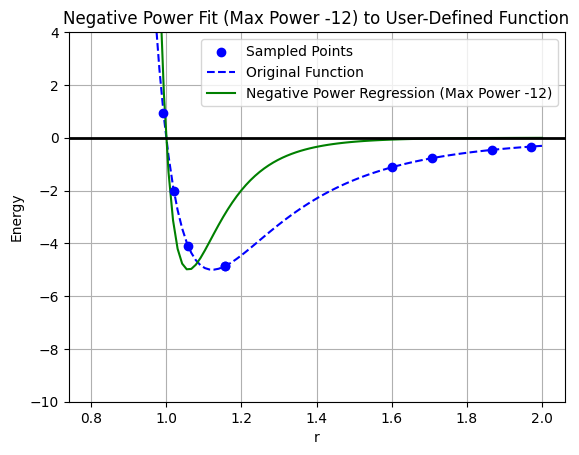

In [ ]:
class OLS_NegativePowers:
    def __init__(self, xs, ys, func, max_power=12):
        """
        Initialize the OLS_NegativePowers class with sampled points and a user-defined function.

        Parameters:
        xs (array-like): Input x values.
        ys (array-like): Corresponding y values.
        func (callable): The original function from which ys are derived.
        max_power (int): The highest negative power (must be an even number).
        """
        self.xs = np.array(xs)
        self.ys = np.array(ys)
        self.func = func
        self.max_power = max_power
        self.beta = None
        self.fit()
    
    def Phi(self, x):
        """Transformation function to create the negative power basis."""
        powers = [1] + [x**(-i) for i in range(1, self.max_power + 1)]
        return np.array(powers)

    def X(self):
        """Construct the design matrix."""
        return np.vstack([self.Phi(x) for x in self.xs])

    def fit(self):
        """Fit the polynomial using OLS."""
        X_matrix = self.X()
        # Using lstsq for numerical stability
        self.beta, _, _, _ = np.linalg.lstsq(X_matrix, self.ys, rcond=None)

    def predict(self, x_values):
        """Predict y values using the fitted negative power model."""
        y_pred = sum(self.beta[i] * x_values**(-2 * i) for i in range(len(self.beta)))
        return y_pred

    def plot_sampled_points(self):
        """Plot the original sampled points."""
        plt.scatter(self.xs, self.ys, color="blue", zorder=5, label="Sampled Points")

    def plot_original_function(self, x_values):
        """Plot the user-defined original function."""
        y_values = self.func(x_values)
        plt.plot(x_values, y_values, label="Original Function", color="blue", linestyle='dashed')

    def plot_negative_power_regression(self, x_values):
        """Plot the negative power regression curve."""
        y_pred = self.predict(x_values)
        plt.plot(x_values, y_pred, color='green', label=f'Negative Power Regression (Max Power -{self.max_power})')

    def plot_all(self, x_range=(0.8, 2), num_points=100):
        x_values = np.linspace(x_range[0], x_range[1], num_points)
        self.plot_sampled_points()
        self.plot_original_function(x_values)
        self.plot_negative_power_regression(x_values)

        plt.xlabel('r')
        plt.ylabel('Energy')
        plt.ylim(-10,4)
        plt.title(f'Negative Power Fit (Max Power -{self.max_power}) to User-Defined Function')
        plt.axhline(0, color='black', linewidth=2) 
        plt.legend()
        plt.grid(True)
        plt.show()

np.random.seed(42)
points_1 = np.random.uniform(0.85, 1, 4)
points_2 = np.random.uniform(1, 2, 8)
combined_points = np.concatenate((points_1, points_2))

x_sample = combined_points
y_sample = [lj.V(x) for x in x_sample]

# Instantiate the OLS_NegativePowers class with the specified points
model = OLS_NegativePowers(x_sample, y_sample, lj.V, max_power=12)

# Fit the model
model.fit()

# Plot the fitted regression and the original function
model.plot_all(x_range=(0.8, 2))



### 7.3 Ridge regression

c) Now fit with ridge regression so that you can have more parameters than data. Use a series of r to positive powers and a series of r to negative pwoers.

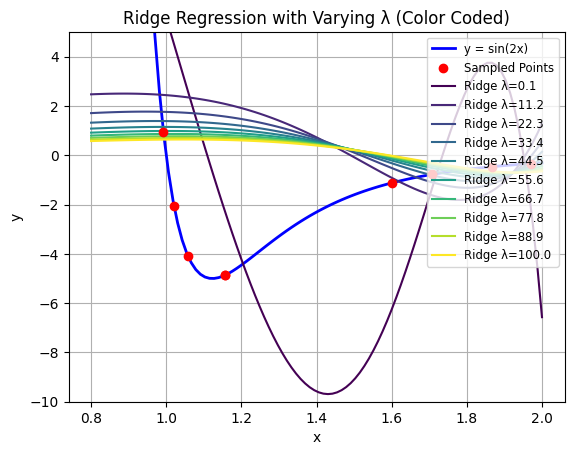

In [641]:
np.random.seed(42)
points_1 = np.random.uniform(0.85, 1, 4)
points_2 = np.random.uniform(1, 2, 8)
combined_points = np.concatenate((points_1, points_2))

x_sample = combined_points
y_sample = [lj.V(x) for x in x_sample]

# Instantiate the OLS_NegativePowers class with the specified points
model = RidgeRegression(x_sample, y_sample, lj.V, 8)

# Fit the model
model.fit()

# Plot the fitted regression and the original function
model.plot(x_range=(0.8, 2))


### 7.4 Kernel ridge regression

d) Do kernel ridge regression with different kernels and different hyperparameters.

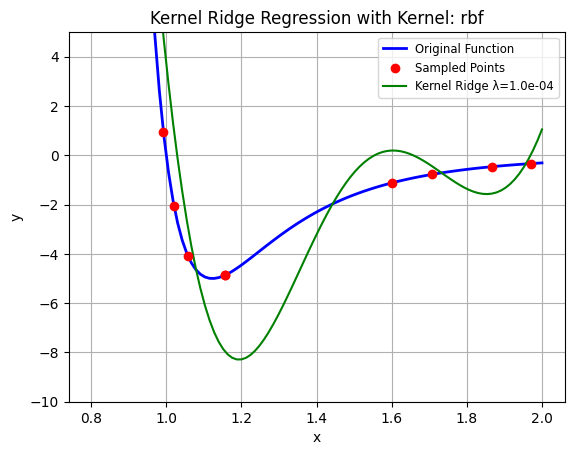

In [642]:
np.random.seed(42)
points_1 = np.random.uniform(0.85, 1, 4)
points_2 = np.random.uniform(1, 2, 8)
combined_points = np.concatenate((points_1, points_2))

x_sample = combined_points
y_sample = [lj.V(x) for x in x_sample]

# Instantiate the OLS_NegativePowers class with the specified points
model = KernelRidgeRegression(x_sample, y_sample, lj.V, kernel='rbf', lamb=10**-4, gamma=1.0, degree=8)

# Fit the model
model.fit()

# Plot the fitted regression and the original function
model.plot(x_range=(0.8, 2))
